In [1]:
#%% Packet som du behöver för att lösa HUPP:en %%#

# Standard paket för att hantera matamatik och arrayer
import numpy as np

# Standard paket för att plotta figurer
import matplotlib.pyplot as plt

### KOM IHÅG ATT ANVÄNDA RÄTT OPERATOR FÖR MATRISMULTIPLIKATION ###


In [2]:
# a)
#%% Fyll i funktionen för att generera en matris som projicerar en Jones-vektor %##

def J_proj(alpha):
    m11 = np.cos(alpha)
    m12 = np.sin(alpha)
    m21 =-np.sin(alpha)
    m22 = np.cos(alpha)
    
    return np.array([[m11, m12],[m21, m22]])

# b)
### Gör liknande funktioner för resterande matriser som behövs ###

def J_pol(alpha):
    m11 = 1 # E_x. Transmissionsriktning = alpha = 0
    m12 = 0
    m21 = 0
    m22 = 0
    
    J_pol_matrix = np.array([[m11, m12],[m21, m22]]) 

    return J_proj(-alpha)@J_pol_matrix@J_proj(alpha)

def J_ret(alpha, phi):
    m11 = np.exp(1j*phi) # eo-riktning = alpha = 0
    m12 = 0
    m21 = 0
    m22 = 1
    
    J_ret_matrix = np.array([[m11, m12],[m21, m22]])
    
    return J_proj(-alpha)@J_ret_matrix@J_proj(alpha)


In [27]:
# c)

print("c)")

phi_quart = np.pi/2

E_in = [1, 0]
print(f'I_in = |E_in|^2 = E_x = {np.abs(E_in[0])**2 + np.abs(E_in[1])**2}')

RR = J_pol(0)@J_ret(3*np.pi/4, phi_quart)@J_ret(np.pi/4, phi_quart)@E_in
RL = J_pol(0)@J_ret(-3*np.pi/4, phi_quart)@J_ret(np.pi/4, phi_quart)@E_in
LR = J_pol(0)@J_ret(3*np.pi/4, phi_quart)@J_ret(-np.pi/4, phi_quart)@E_in
LL = J_pol(0)@J_ret(-3*np.pi/4, phi_quart)@J_ret(-np.pi/4, phi_quart)@E_in # OBS eo-riktningen speglas i x-axeln beroende på ifall ljuset träffar framsidan eller baksidan av kvartsplattan.
print()
print(f'E_ut för   i) R->R: {RR}')
print(f'E_ut för  ii) R->L: {RL}')
print(f'E_ut för iii) L->R: {LR}')
print(f'E_ut för  iv) L->L: {LL}')
print()
print(f'I_ut för   i) R->R: {np.abs(RR[0])**2 + np.abs(RR[1])**2}')
print(f'I_ut för  ii) R->L: {np.abs(RL[0])**2 + np.abs(RL[1])**2}')
print(f'I_ut för iii) L->R: {np.abs(LR[0])**2 + np.abs(LR[1])**2}')
print(f'I_ut för  iv) L->L: {np.abs(LL[0])**2 + np.abs(LL[1])**2}')

c)
I_in = |E_in|^2 = E_x = 1

E_ut för   i) R->R: [1.94289029e-16+1.j 0.00000000e+00+0.j]
E_ut för  ii) R->L: [1.11022302e-16+8.32667268e-17j 0.00000000e+00+0.00000000e+00j]
E_ut för iii) L->R: [1.11022302e-16+8.32667268e-17j 0.00000000e+00+0.00000000e+00j]
E_ut för  iv) L->L: [1.94289029e-16+1.j 0.00000000e+00+0.j]

I_ut för   i) R->R: 1.0
I_ut för  ii) R->L: 1.9259299443872359e-32
I_ut för iii) L->R: 1.9259299443872359e-32
I_ut för  iv) L->L: 1.0


In [33]:
# d)

print("d)")

fel_marginal = 1.25

print(f"Felkoefficient = {fel_marginal}")

RR = J_pol(0)@J_ret(3*np.pi/4, phi_quart*fel_marginal)@J_ret(np.pi/4, phi_quart*fel_marginal)@E_in
RL = J_pol(0)@J_ret(-3*np.pi/4, phi_quart*fel_marginal)@J_ret(np.pi/4, phi_quart*fel_marginal)@E_in
LR = J_pol(0)@J_ret(3*np.pi/4, phi_quart*fel_marginal)@J_ret(-np.pi/4, phi_quart*fel_marginal)@E_in
LL = J_pol(0)@J_ret(-3*np.pi/4, phi_quart*fel_marginal)@J_ret(-np.pi/4, phi_quart*fel_marginal)@E_in

print()
print(f'E_ut för   i) R->R: {RR}')
print(f'E_ut för  ii) R->L: {RL}')
print(f'E_ut för iii) L->R: {LR}')
print(f'E_ut för  iv) L->L: {LL}')
print()
print(f'I_ut för   i) R->R: {np.abs(RR[0])**2 + np.abs(RR[1])**2}')
print(f'I_ut för  ii) R->L: {np.abs(RL[0])**2 + np.abs(RL[1])**2}')
print(f'I_ut för iii) L->R: {np.abs(LR[0])**2 + np.abs(LR[1])**2}')
print(f'I_ut för  iv) L->L: {np.abs(LL[0])**2 + np.abs(LL[1])**2}')

d)
Felkoefficient = 1.25

E_ut för   i) R->R: [-0.38268343+0.92387953j  0.        +0.j        ]
E_ut för  ii) R->L: [0.14644661-0.35355339j 0.        +0.j        ]
E_ut för iii) L->R: [0.14644661-0.35355339j 0.        +0.j        ]
E_ut för  iv) L->L: [-0.38268343+0.92387953j  0.        +0.j        ]

I_ut för   i) R->R: 1.0
I_ut för  ii) R->L: 0.14644660940672624
I_ut för iii) L->R: 0.14644660940672624
I_ut för  iv) L->L: 1.0


In [34]:
# e)

print("e)")

E_in_rot = [0,1]


print(f'I_in = |E_in|^2 = E_y = {np.abs(E_in[0])**2 + np.abs(E_in[1])**2}')

RR = J_pol(0)@J_ret(3*np.pi/4, phi_quart*fel_marginal)@J_ret(-np.pi/4, phi_quart*fel_marginal)@E_in_rot
RL = J_pol(0)@J_ret(-3*np.pi/4, phi_quart*fel_marginal)@J_ret(-np.pi/4, phi_quart*fel_marginal)@E_in_rot
LR = J_pol(0)@J_ret(3*np.pi/4, phi_quart*fel_marginal)@J_ret(-3*np.pi/4, phi_quart*fel_marginal)@E_in_rot
LL = J_pol(0)@J_ret(-3*np.pi/4, phi_quart*fel_marginal)@J_ret(-3*np.pi/4, phi_quart*fel_marginal)@E_in_rot # OBS eo-riktningen speglas i x-axeln beroende på ifall ljuset träffar framsidan eller baksidan av kvartsplattan.

print()
print(f'E_ut för   i) R->R: {RR}')
print(f'E_ut för  ii) R->L: {RL}')
print(f'E_ut för iii) L->R: {LR}')
print(f'E_ut för  iv) L->L: {LL}')
print()
print(f'I_ut för   i) R->R: {np.abs(RR[0])**2 + np.abs(RR[1])**2}')
print(f'I_ut för  ii) R->L: {np.abs(RL[0])**2 + np.abs(RL[1])**2}')
print(f'I_ut för iii) L->R: {np.abs(LR[0])**2 + np.abs(LR[1])**2}')
print(f'I_ut för  iv) L->L: {np.abs(LL[0])**2 + np.abs(LL[1])**2}')

e)
I_in = |E_in|^2 = E_y = 1

E_ut för   i) R->R: [0.85355339+0.35355339j 0.        +0.j        ]
E_ut för  ii) R->L: [8.6294494e-17-1.11022302e-16j 0.0000000e+00+0.00000000e+00j]
E_ut för iii) L->R: [-1.18159291e-16+2.22044605e-16j  0.00000000e+00+0.00000000e+00j]
E_ut för  iv) L->L: [-0.85355339-0.35355339j  0.        +0.j        ]

I_ut för   i) R->R: 0.8535533905932737
I_ut för  ii) R->L: 1.977269134132752e-32
I_ut för iii) L->R: 6.326542458960205e-32
I_ut för  iv) L->L: 0.8535533905932731


In [6]:
# 2 

def n_eo_theta(theta, n_eo, n_o):
    return n_eo*n_o/(np.sqrt((n_o*np.cos(theta))**2 + (n_eo*np.sin(theta))**2))
    
def alpha_n(N_skiv, n):
    return np.pi*n/(2*N_skiv)


# a)

    
def J_ret_n(alpha_n, delta, n_eo, n_o, lam):
    k_0 = 2*np.pi/lam
    m11 = np.exp(1j*(k_0*delta*(n_eo-n_o))) # eo-riktning = alpha = 0
    m12 = 0
    m21 = 0
    m22 = 1
    
    J_ret_matrix = np.array([[m11, m12],[m21, m22]])
    return J_proj(-alpha_n)@J_ret_matrix@J_proj(alpha_n)

V=0 --> theta=90, V=100%-->theta=0


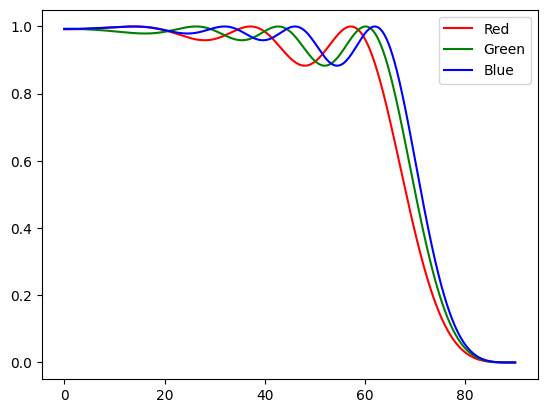

In [14]:
# b)


lam_R = 633e-9
lam_G = 533e-9
lam_B = 473e-9

theta_array = np.arange(0, np.pi/2, 0.001)


n_o = 1.50
n_eo = 1.60
N_skiv = 50
d = 20e-6
delta = d/N_skiv



def I_ut(theta, lam):
    E_in = [1,0]
    n_eo_t = n_eo_theta(theta, n_eo, n_o)
    
    for n in range(1, N_skiv + 1):
        a_n = alpha_n(N_skiv, n)
        E_in = J_ret_n(a_n, delta, n_eo_t, n_o, lam)@E_in
    E_ut = J_pol(a_n)@E_in
    return np.abs(E_ut[0])**2 + np.abs(E_ut[1])**2


I_ut_array = []
for theta in theta_array:
    I_ut_array.append(I_ut(theta, lam_R))

plt.plot(theta_array*(180/np.pi), I_ut_array, label="Red", color="r")


I_ut_array = []
for theta in theta_array:
    I_ut_array.append(I_ut(theta, lam_G))

plt.plot(theta_array*(180/np.pi), I_ut_array, label="Green", color="g")


I_ut_array = []
for theta in theta_array:
    I_ut_array.append(I_ut(theta, lam_B))

plt.plot(theta_array*(180/np.pi), I_ut_array, label="Blue", color="b")

plt.legend()
plt.show

print("V=0 --> theta=90, V=100%-->theta=0")

d = 4.7e-06


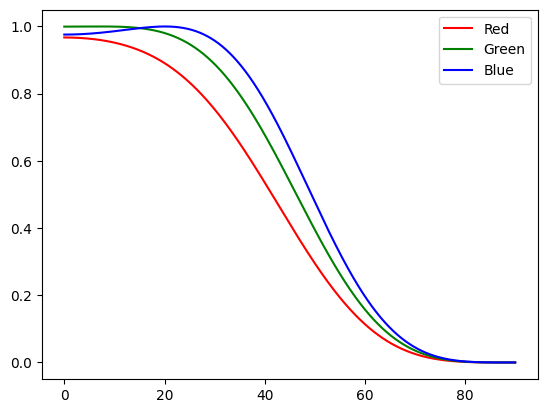

In [15]:
# d) 

d = 4.7e-6
delta = d/N_skiv

def I_ut(theta, lam):
    E_in = [1,0]
    
    n_eo_t = n_eo_theta(theta, n_eo, n_o)
    
    for n in range(1, N_skiv + 1):
        a_n = alpha_n(N_skiv, n)
        E_in = J_ret_n(a_n, delta, n_eo_t, n_o, lam)@E_in
    E_ut = E_in@J_pol(a_n)
    return np.abs(E_ut[0])**2 + np.abs(E_ut[1])**2


I_ut_array = []
for theta in theta_array:
    I_ut_array.append(I_ut(theta, lam_R))

plt.plot(theta_array*(180/np.pi), I_ut_array, label="Red", color="r")


I_ut_array = []
for theta in theta_array:
    I_ut_array.append(I_ut(theta, lam_G))

plt.plot(theta_array*(180/np.pi), I_ut_array, label="Green", color="g")


I_ut_array = []
for theta in theta_array:
    I_ut_array.append(I_ut(theta, lam_B))

plt.plot(theta_array*(180/np.pi), I_ut_array, label="Blue", color="b")

plt.legend()
plt.show

print(f"d = {d}")